In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords

In [38]:
bitcoin=pd.read_excel("bitcoin.xlsx")

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def text_preproc(x):
  x = x.lower()
  
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x
bitcoin['clean_title'] = bitcoin['Video'].apply(text_preproc)
bitcoin['clean_description'] = bitcoin['Description'].apply(text_preproc)

In [41]:
stop = stopwords.words('english')

In [42]:
bitcoin['clean_title'] = bitcoin['clean_title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
bitcoin['clean_description'] = bitcoin['clean_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
bitcoin.head()

,Video,Views,Likes,Dislikes,Channel,Description,clean_title,clean_description
0,"Johnson & Johnson, Jay Powell, and Bitcoin: Ji...",35633,151,7,Jim Cramer & TheStreet,"In today’s market breakdown, Jim Cramer and Ka...",johnson johnson jay powell bitcoin jim cramer ...,todays market breakdown jim cramer katherine r...
1,Coinbase will be huge... it's a cash engine ri...,23994,280,5,Yahoo Finance,Bullpen Capital Founder Duncan Davidson report...,coinbase huge cash engine right bullpen capita...,bullpen capital founder duncan davidson report...
2,Bitcoin hits record before landmark Coinbase l...,1147,21,0,Reuters,"Bitcoin hit a record of $62,741 on Tuesday, ex...",bitcoin hits record landmark coinbase listing ...,bitcoin hit record tuesday extending rally new...
3,Bitcoin hits new high ahead of Coinbase's dire...,14829,152,4,Yahoo Finance,"\nMeltem Demirors, CoinShares chief strategy o...",bitcoin hits new high ahead coinbase direct li...,meltem demirors coinshares chief strategy offi...
4,What Coinbases's IPO means for the crypto mark...,35633,179,0,Yahoo Finance,"Yahoo Finance's Zach Guzman, Myles Udland and ...",coinbases ipo means crypto market plus bitcoin...,yahoo finance zach guzman myles udland brian s...


In [43]:
pip install wordcloud

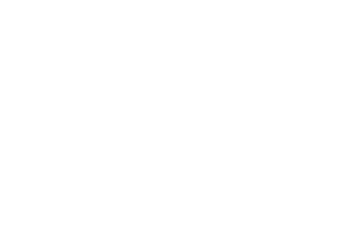

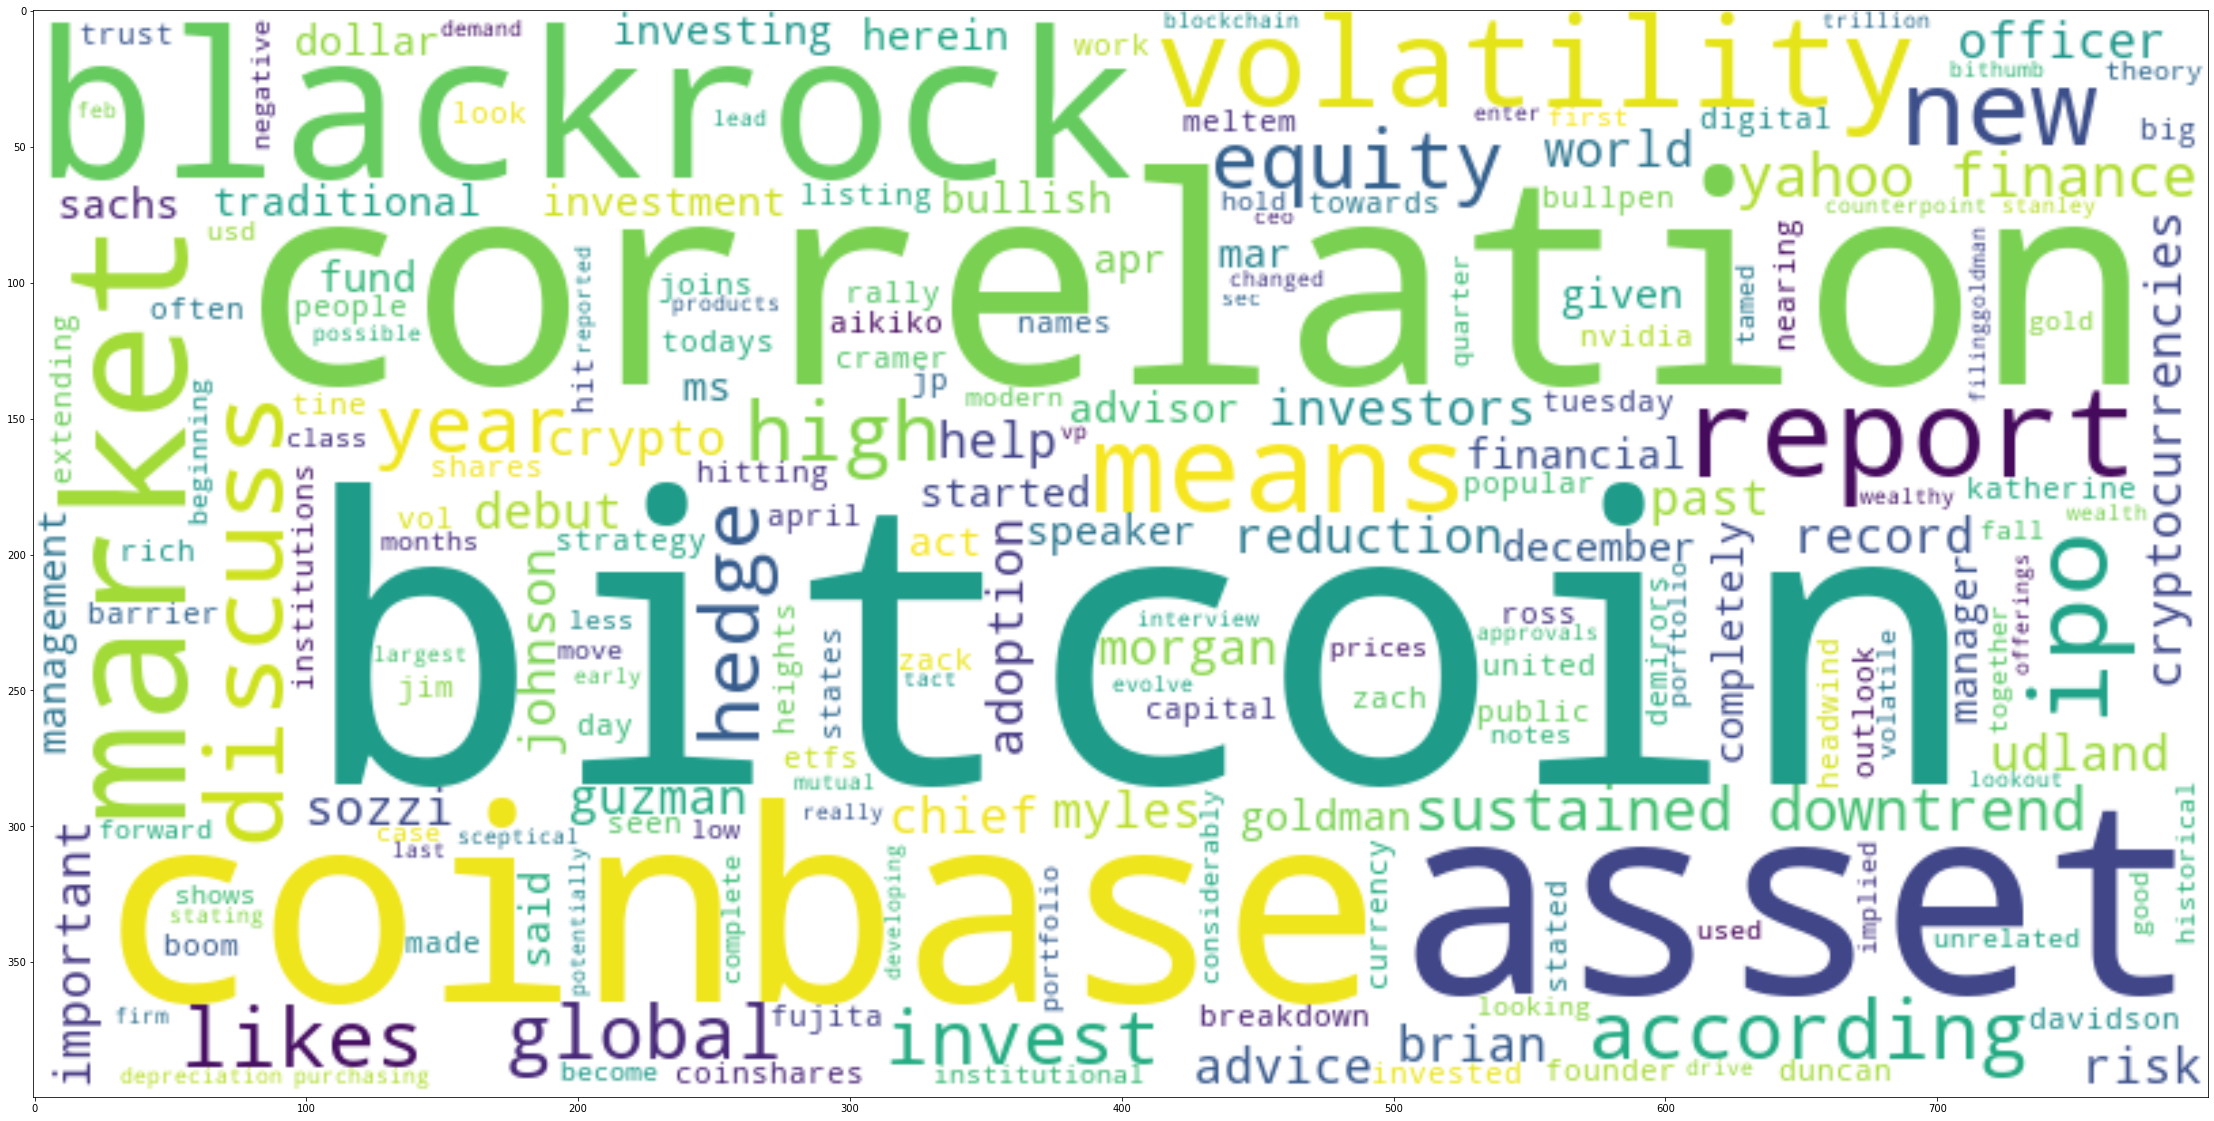

In [44]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
text = " ".join(review for review in bitcoin.clean_description.astype(str))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#Sentiment Analysis

In [45]:
from textblob import TextBlob

In [46]:
desc_blob = [TextBlob(desc) for desc in bitcoin['clean_description']]
#add the sentiment metrics (polarity and subjectivity) to the dataframe
bitcoin['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
bitcoin['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]
bitcoin

,Video,Views,Likes,Dislikes,Channel,Description,clean_title,clean_description,tb_Pol,tb_Subj
0,"Johnson & Johnson, Jay Powell, and Bitcoin: Ji...",35633,151,7,Jim Cramer & TheStreet,"In today’s market breakdown, Jim Cramer and Ka...",johnson johnson jay powell bitcoin jim cramer ...,todays market breakdown jim cramer katherine r...,0.136364,0.454545
1,Coinbase will be huge... it's a cash engine ri...,23994,280,5,Yahoo Finance,Bullpen Capital Founder Duncan Davidson report...,coinbase huge cash engine right bullpen capita...,bullpen capital founder duncan davidson report...,0.000000,0.066667
2,Bitcoin hits record before landmark Coinbase l...,1147,21,0,Reuters,"Bitcoin hit a record of $62,741 on Tuesday, ex...",bitcoin hits record landmark coinbase listing ...,bitcoin hit record tuesday extending rally new...,0.136364,0.454545
3,Bitcoin hits new high ahead of Coinbase's dire...,14829,152,4,Yahoo Finance,"\nMeltem Demirors, CoinShares chief strategy o...",bitcoin hits new high ahead coinbase direct li...,meltem demirors coinshares chief strategy offi...,0.136364,0.454545
4,What Coinbases's IPO means for the crypto mark...,35633,179,0,Yahoo Finance,"Yahoo Finance's Zach Guzman, Myles Udland and ...",coinbases ipo means crypto market plus bitcoin...,yahoo finance zach guzman myles udland brian s...,0.000000,0.000000
5,What’s behind the Bitcoin hype? | Start Here,397863,6300,217,Al Jazeera English,Bitcoin is the most popular digital currency i...,whats behind bitcoin hype start,bitcoin popular digital currency world big nam...,0.243750,0.437500
6,A look at the Coinbase IPO and its impact on o...,2811,28,0,Yahoo Finance,\nYahoo Finance's Aikiko Fujita and Zack Guzma...,look coinbase ipo impact cryptocurrencies etfs,yahoo finance aikiko fujita zack guzman look c...,0.000000,0.000000
7,Bitcoin on the BRINK?This could change EVERYTH...,228416,7600,81,Coin Bearue,📉 Vol Reduction 📉Volatility is often seen as a...,bitcoin brink could change everything,vol reduction volatility often seen barrier bi...,0.073629,0.409961
8,Coinbase Just Doubled | Why it Might 5x FAST |...,179478,4000,79,Meet Kevin,Coinbase IPO. 🚀🚀Use 39% off Coupon ToTheMoon o...,coinbase doubled might fast coinbase ipo,coinbase ipo use coupon tothemoon stock real e...,0.200000,0.300000


In [50]:
bitcoin['Sentiment_Type']=['Positive','Neutral','Positive','Positive','Neutral','Positive','Neutral','Positive','Positive']

In [51]:
bitcoin

,Video,Views,Likes,Dislikes,Channel,Description,clean_title,clean_description,tb_Pol,tb_Subj,Sentiment_Type
0,"Johnson & Johnson, Jay Powell, and Bitcoin: Ji...",35633,151,7,Jim Cramer & TheStreet,"In today’s market breakdown, Jim Cramer and Ka...",johnson johnson jay powell bitcoin jim cramer ...,todays market breakdown jim cramer katherine r...,0.136364,0.454545,Positive
1,Coinbase will be huge... it's a cash engine ri...,23994,280,5,Yahoo Finance,Bullpen Capital Founder Duncan Davidson report...,coinbase huge cash engine right bullpen capita...,bullpen capital founder duncan davidson report...,0.000000,0.066667,Neutral
2,Bitcoin hits record before landmark Coinbase l...,1147,21,0,Reuters,"Bitcoin hit a record of $62,741 on Tuesday, ex...",bitcoin hits record landmark coinbase listing ...,bitcoin hit record tuesday extending rally new...,0.136364,0.454545,Positive
3,Bitcoin hits new high ahead of Coinbase's dire...,14829,152,4,Yahoo Finance,"\nMeltem Demirors, CoinShares chief strategy o...",bitcoin hits new high ahead coinbase direct li...,meltem demirors coinshares chief strategy offi...,0.136364,0.454545,Positive
4,What Coinbases's IPO means for the crypto mark...,35633,179,0,Yahoo Finance,"Yahoo Finance's Zach Guzman, Myles Udland and ...",coinbases ipo means crypto market plus bitcoin...,yahoo finance zach guzman myles udland brian s...,0.000000,0.000000,Neutral
5,What’s behind the Bitcoin hype? | Start Here,397863,6300,217,Al Jazeera English,Bitcoin is the most popular digital currency i...,whats behind bitcoin hype start,bitcoin popular digital currency world big nam...,0.243750,0.437500,Positive
6,A look at the Coinbase IPO and its impact on o...,2811,28,0,Yahoo Finance,\nYahoo Finance's Aikiko Fujita and Zack Guzma...,look coinbase ipo impact cryptocurrencies etfs,yahoo finance aikiko fujita zack guzman look c...,0.000000,0.000000,Neutral
7,Bitcoin on the BRINK?This could change EVERYTH...,228416,7600,81,Coin Bearue,📉 Vol Reduction 📉Volatility is often seen as a...,bitcoin brink could change everything,vol reduction volatility often seen barrier bi...,0.073629,0.409961,Positive
8,Coinbase Just Doubled | Why it Might 5x FAST |...,179478,4000,79,Meet Kevin,Coinbase IPO. 🚀🚀Use 39% off Coupon ToTheMoon o...,coinbase doubled might fast coinbase ipo,coinbase ipo use coupon tothemoon stock real e...,0.200000,0.300000,Positive


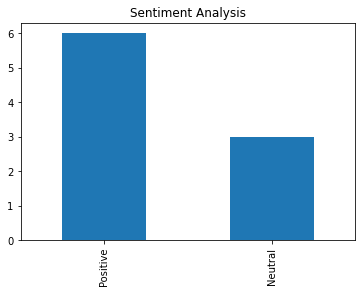

In [52]:
bitcoin.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")